In [5]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

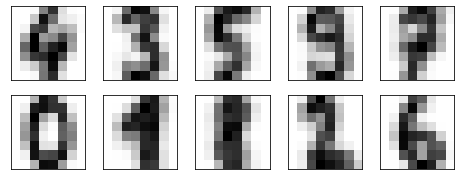

In [6]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape
from matplotlib import pyplot as plt
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)


In [7]:
import numpy as np
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [8]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951

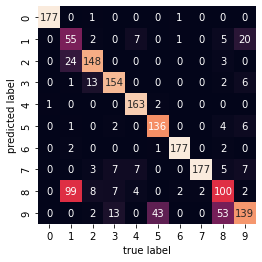

In [9]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [10]:
from sklearn.manifold import TSNE

# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# Compute the clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# Permute the labels
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# Compute the accuracy
accuracy_score(digits.target, labels)


C:\Users\wasif mustaqeem\AppData\Roaming\Python\Python39\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


0.9415692821368948

# Example 2: k-means

In [11]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt


In [12]:
make_blobs()[0].shape,make_blobs()[1].shape

((100, 2), (100,))

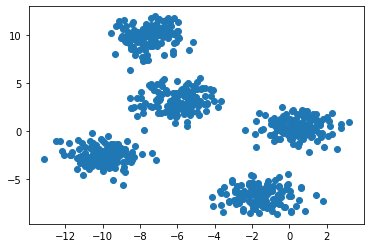

In [13]:
#data,target=make_blobs()
#data,target=make_blobs()[0],make_blobs()[1]
data,target=make_blobs(centers=5,n_samples=700)
##data,target
#DataFrame()
plt.scatter(data[:,0],data[:,1])


In [14]:
knn=KMeans(n_clusters=5)
knn.fit(data)

pred=knn.predict(data)



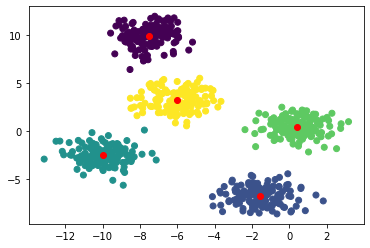

In [15]:
plt.scatter(data[:,0],data[:,1],c=pred)
centers=knn.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='red')

[[ -0.30386156   0.25094416]
 [ -8.0959755    9.27179136]
 [-10.97353417  -2.14796642]
 [ -6.66029859   2.36385576]
 [ -2.31244199  -6.56780156]
 [  1.24345893   0.59909828]
 [ -9.49585476  -2.80940848]
 [ -0.63091261  -6.97216577]
 [ -6.90156498  10.48204592]
 [ -5.58631653   3.83346432]]


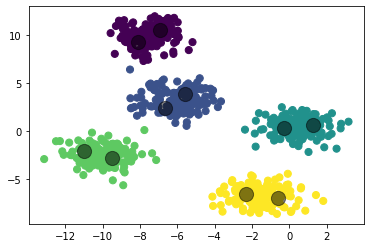

In [25]:

from matplotlib import pyplot as plt
plt.scatter(data[:,0],data[:,1],c=target,s=50,cmap='viridis');
centers=kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='black',s=200,alpha=0.5)
print(centers)

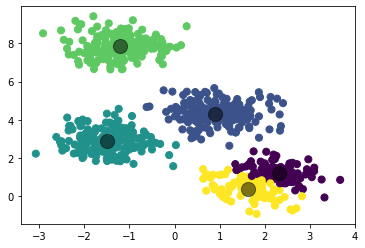

In [26]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=700, centers=4,
                       cluster_std=0.60, random_state=0)
#print(X,y_true)
#plt.scatter(X[:, 0], X[:, 1], s=50);
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);